In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib

import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/nhk/data.csv')
df = df.convert_dtypes()
df.head(3)

,event_id,id,title,subtitle,content,info,genre_code,genre_name,genre_name_main,genre_name_detailed,genre_id
0,28436,2021090628436,北アルプス「北アルプスの名峰」,北アルプスに位置する百名山をはじめとする名峰の数々,<NA>,北アルプス「北アルプスの名峰」。北アルプスに位置する百名山をはじめとする名峰の数々。,802,ドキュメンタリー/教養 | 自然・動物・環境,ドキュメンタリー/教養,自然・動物・環境,67
1,24386,2021090624386,みんなのうた「わたしの紙風船」「天下無敵のゴーヤーマン★」,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセール,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセール,みんなのうた「わたしの紙風船」「天下無敵のゴーヤーマン★」。「わたしの紙風船」うた：紙ふうせ...,409,音楽 | 童謡・キッズ,音楽,童謡・キッズ,46
2,24386,2021090624386,みんなのうた「わたしの紙風船」「天下無敵のゴーヤーマン★」,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセール,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセール,みんなのうた「わたしの紙風船」「天下無敵のゴーヤーマン★」。「わたしの紙風船」うた：紙ふうせ...,700,アニメ/特撮 | 国内アニメ,アニメ/特撮,国内アニメ,61


<Axes: xlabel='genre_name_main'>

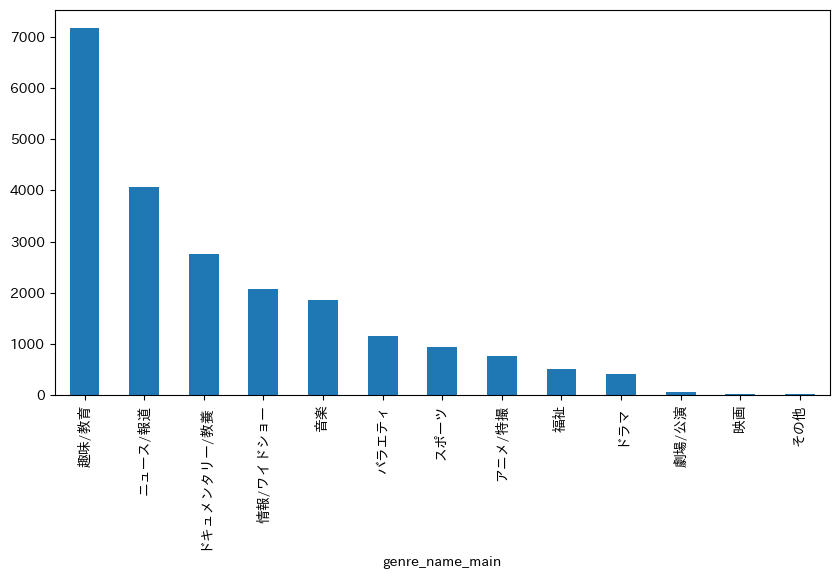

In [3]:
df['genre_name_main'].value_counts().plot.bar(figsize=(10, 5))

In [4]:
df[['content', 'info']].dtypes

content    string[python]
info       string[python]
dtype: object

In [5]:
df[['content', 'info']] = df[['content', 'info']].fillna('')

In [6]:
df['all_content'] = df[['content', 'info']].apply(lambda x: ''.join(x), axis = 1)

## Replace some categories

In [7]:
df.head(2)

,event_id,id,title,subtitle,content,info,genre_code,genre_name,genre_name_main,genre_name_detailed,genre_id,all_content
0,28436,2021090628436,北アルプス「北アルプスの名峰」,北アルプスに位置する百名山をはじめとする名峰の数々,,北アルプス「北アルプスの名峰」。北アルプスに位置する百名山をはじめとする名峰の数々。,802,ドキュメンタリー/教養 | 自然・動物・環境,ドキュメンタリー/教養,自然・動物・環境,67,北アルプス「北アルプスの名峰」。北アルプスに位置する百名山をはじめとする名峰の数々。
1,24386,2021090624386,みんなのうた「わたしの紙風船」「天下無敵のゴーヤーマン★」,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセール,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセール,みんなのうた「わたしの紙風船」「天下無敵のゴーヤーマン★」。「わたしの紙風船」うた：紙ふうせ...,409,音楽 | 童謡・キッズ,音楽,童謡・キッズ,46,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセールみんなの...


## Organizing new dataframe

In [15]:
newdf = df[['all_content', 'genre_name_main']].copy()
newdf['new_categories'] = newdf['genre_name_main']
newdf.head(3)

,all_content,genre_name_main,new_categories
0,北アルプス「北アルプスの名峰」。北アルプスに位置する百名山をはじめとする名峰の数々。,ドキュメンタリー/教養,ドキュメンタリー/教養
1,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセールみんなの...,音楽,音楽
2,「わたしの紙風船」うた：紙ふうせん／「天下無敵のゴーヤーマン★」うた：ガレッジセールみんなの...,アニメ/特撮,アニメ/特撮


In [16]:
newdf['new_categories'] = newdf['new_categories'].astype('category')

In [17]:
newdf['new_categories'] = newdf['new_categories'].cat.rename_categories({'ドキュメンタリー/教養': 'ドキュメンタリー', 
    'アニメ/特撮': 'アニメ', 
    '情報/ワイドショー': '情報',
    'ニュース/報道': 'ニュース', 
    '趣味/教育': '趣味', 
    '劇場/公演': '劇場'})

In [18]:
newdf['new_categories'].value_counts()

new_categories
趣味          7170
ニュース        4070
ドキュメンタリー    2766
情報          2067
音楽          1857
バラエティ       1144
スポーツ         943
アニメ          763
福祉           503
ドラマ          407
劇場            63
映画            28
その他           14
Name: count, dtype: int64

## Classification

In [12]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import torch

2024-07-12 09:43:23.271591: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 09:43:23.383301: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 09:43:23.799759: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 09:43:26.390915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
bert_model="Formzu/bert-base-japanese-jsnli"

In [36]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
classifier = AutoModelForSequenceClassification.from_pretrained(bert_model).to(device)
tokenizer = AutoTokenizer.from_pretrained(bert_model)

## splitting the dataframe

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [23]:
X_train, X_val, y_train, y_val = train_test_split(newdf['all_content'],
                                                  newdf['new_categories'], 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  stratify=newdf['new_categories'].values)


In [24]:
X_train

20889             エンジョイ・シンプル・イングリッシュ「おくのほそ道　旅立ち」。【司会】関根麻里。
5144     イタリア、ポルトガル、ギリシャ、ノルウェー、スコットランドの海岸線を旅する。壁が縦じまに塗ら...
17655    ラジオビジネス英語　Ｌｅｓｓｏｎ（６６）。【講師】神田外語大学特任教授…柴田真一，【出演】ジ...
16583    富田靖子の大阪水の旅▽千年続く水の祭り天神祭に密着▽陸に上がり堀を巡り祭りを盛り上げる手こぎ...
11534    遠山顕の英会話楽習「９月Ｄｉａｌｏｇ６」。【講師】遠山顕，【出演】キャロリン・ミラー，ジェフ...
                               ...                        
5072     サンドウィッチマンが病院に特設ラジオ局を開設。シリーズ６回目は神奈川県厚木市の巨大なリハビリ...
7844     ＮＨＫ手話ニュース８４５。きょう一日の国内外の主な出来事や最新のニュースを手話と映像でコンパ...
4508     「ビジネスは歴史的使命を終えた」と語る独立研究者・山口周。持続可能な脱成長を説いた著書『人新...
13831                                      ニュース・天気予報・交通情報。
11920    異文化コミュニケーションをテーマにした「ざわざわ森のがんこちゃん」のスピンオフ番組！がんこち...
Name: all_content, Length: 15256, dtype: object

In [30]:
categories = newdf['new_categories'].unique().tolist()

In [45]:
X_train.head()

20889             エンジョイ・シンプル・イングリッシュ「おくのほそ道　旅立ち」。【司会】関根麻里。
5144     イタリア、ポルトガル、ギリシャ、ノルウェー、スコットランドの海岸線を旅する。壁が縦じまに塗ら...
17655    ラジオビジネス英語　Ｌｅｓｓｏｎ（６６）。【講師】神田外語大学特任教授…柴田真一，【出演】ジ...
16583    富田靖子の大阪水の旅▽千年続く水の祭り天神祭に密着▽陸に上がり堀を巡り祭りを盛り上げる手こぎ...
11534    遠山顕の英会話楽習「９月Ｄｉａｌｏｇ６」。【講師】遠山顕，【出演】キャロリン・ミラー，ジェフ...
Name: all_content, dtype: object

In [46]:
i = 20889
text = X_train[i]
real_class = y_train[i]
hypothesis = f'この例は{real_class}です。'

print(text)
print(hypothesis)


#out = classifier(text, categories)
#print(out)

エンジョイ・シンプル・イングリッシュ「おくのほそ道　旅立ち」。【司会】関根麻里。
この例は趣味です。


In [40]:
text = "いつか世界を見る。"
real_class = '旅行'
hypothesis = f'この例は{real_class}です。'

In [47]:
input = tokenizer.encode(text, hypothesis, return_tensors='pt').to(device)
with torch.no_grad():
    logits = classifier(input)["logits"][0]
    probs = logits.softmax(dim=-1)
    print(probs.cpu().numpy(), logits.cpu().numpy())
    prob_element = probs.cpu().numpy()[0]

[0.5032649  0.3028226  0.19391257] [ 0.91574883  0.40777934 -0.03796046]


In [48]:
prob_element

0.5032649